In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Car Price Analysis

* Read in the dataset `car_prices.csv` using the code below.
* Run the info and describe DataFrame methods to get a quick understanding of the data.

In [3]:
cars = pd.read_csv(r"C:\Users\12896\OneDrive\Desktop - Copy\Preparation\Maven\Python\DataVizwithMatplotlibSeaborn-230301-073744 (1)\Data Viz with Matplotlib & Seaborn\Data\car_prices.csv", on_bad_lines='skip')

In [5]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
# 1. Cleaning Unnecessary data
cars['saledate'] = cars['saledate'].str.replace(r' GMT.*', '', regex = True)

cars['saledate'] = pd.to_datetime(cars['saledate'])

In [9]:
cars['saledate']

0        2014-12-16 12:30:00
1        2014-12-16 12:30:00
2        2015-01-15 04:30:00
3        2015-01-29 04:30:00
4        2014-12-18 12:30:00
                 ...        
558806   2015-07-09 07:00:00
558807   2015-07-08 09:30:00
558808   2015-07-08 09:30:00
558809   2015-07-09 06:45:00
558810   2015-05-28 05:30:00
Name: saledate, Length: 558811, dtype: datetime64[ns]

In [11]:
cars.describe()

,year,condition,odometer,mmr,sellingprice,saledate
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000,558811
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461,2015-03-06 07:54:09.305936384
min,1982.000000,1.000000,1.000000,25.000000,1.000000,2014-01-01 09:15:00
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000,2015-01-21 02:00:00
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000,2015-02-13 03:20:00
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000,2015-05-22 02:00:00
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000,2015-07-21 02:30:00
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919,NaN


# Numeric Variable Relationships

I am using a pair plot to get a good sense of the relationships between the numeric variables in the dataset.

Turn off the upper corner of the pairplot matrix.

* Why is the relationship between `selling price` and `MMR` (the recommended selling price) so strong?
* What is the relationship between `selling price` and `year` (the year the car was manufactured)? Do you think this makes sense?
* After examining the two relationships above, we will filter the data frame down to the `body` styles ['SUV,' 'Sedan,' 'Convertible,' and 'Coupe']. Coloring the scatterplot based on values in the `body` column. 

C:\Users\12896\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\12896\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\12896\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\12896\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

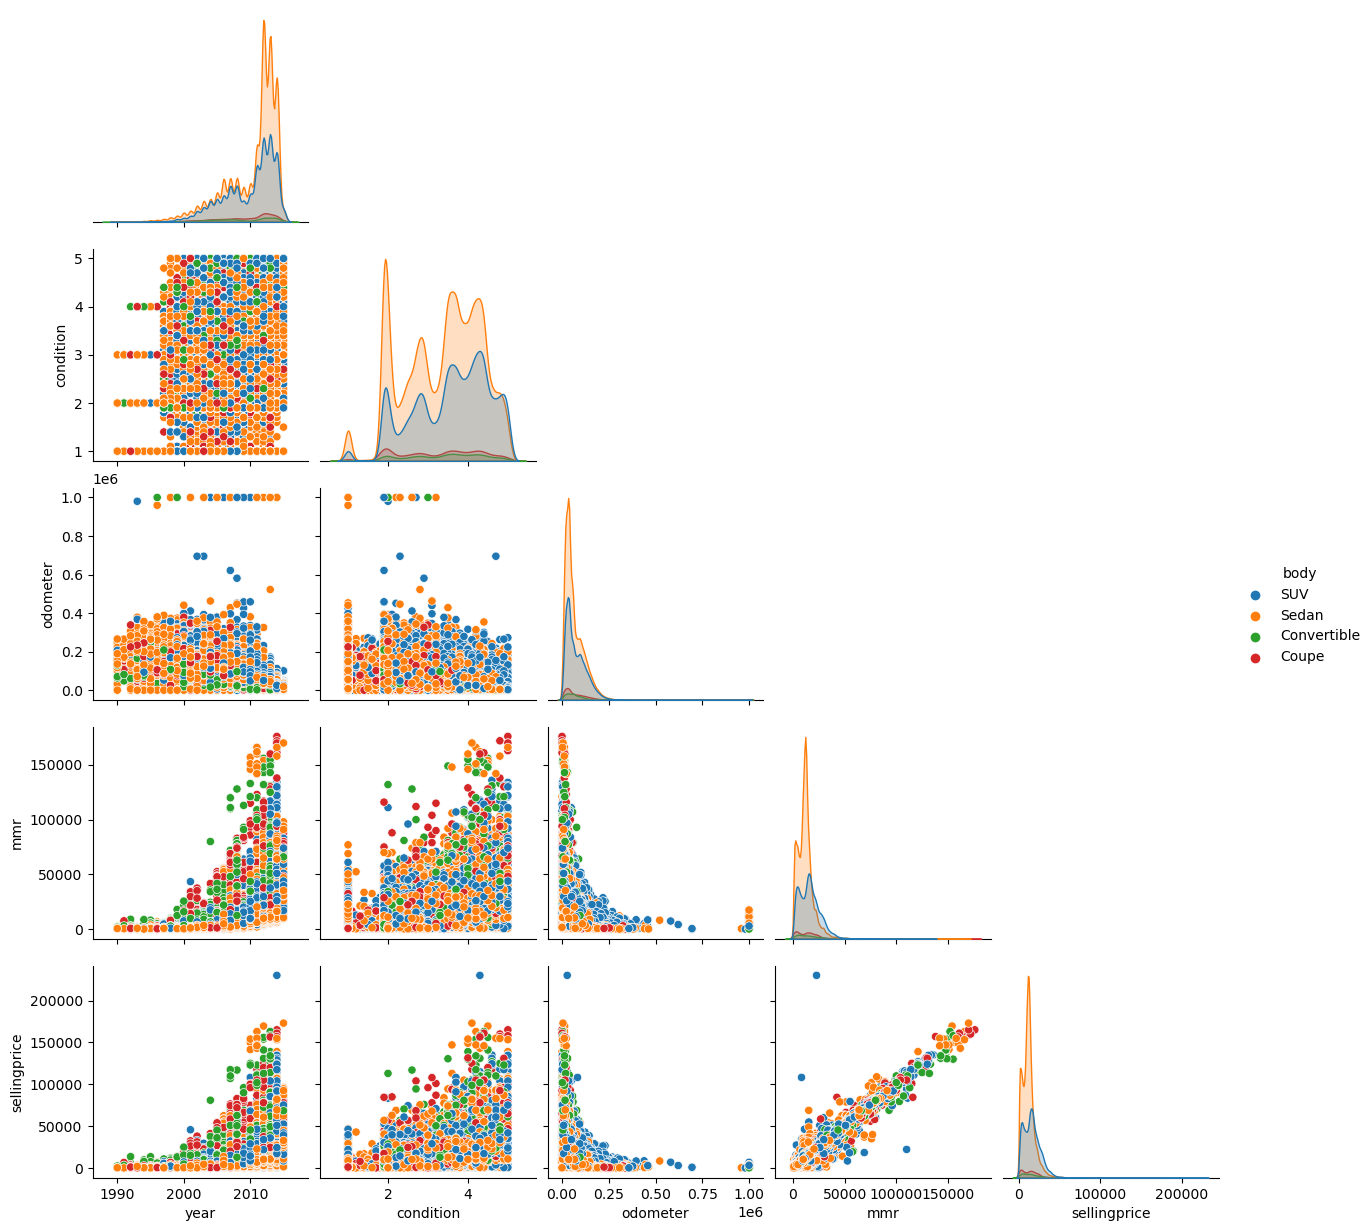

In [13]:
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]

sns.pairplot(
    data = cars.query('body in @style_list'), 
    hue = 'body', 
    corner = True
);


#### Correlation Heat Map

* Plot a heatmap of the correlation between the numeric variables. Does it make sense year and condition and odomoter are negatively correlated?


<Axes: >

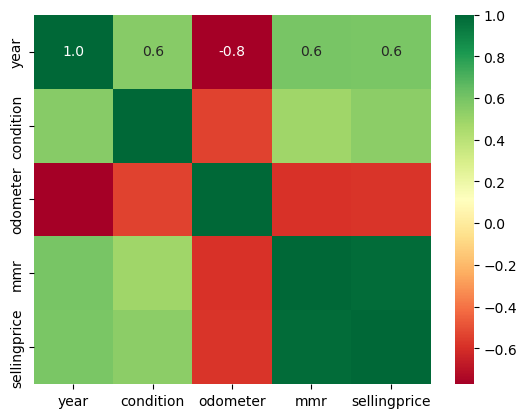

In [15]:
numerical_cols = cars.select_dtypes(include = ['float64', 'int64'])

sns.heatmap(
    numerical_cols.corr(),
    annot= True, 
    cmap = 'RdYlGn', 
    fmt = '.1f'
)

#### Value Retention

* Filtering data down to the following values of `make` (brand): ['Ford', 'BMW', 'Toyota', 'Chevy'] 

* Building a linear relationship plot comparing `odometer` (distance car has travelled) vs. `sellingprice`, broken out by `make`.


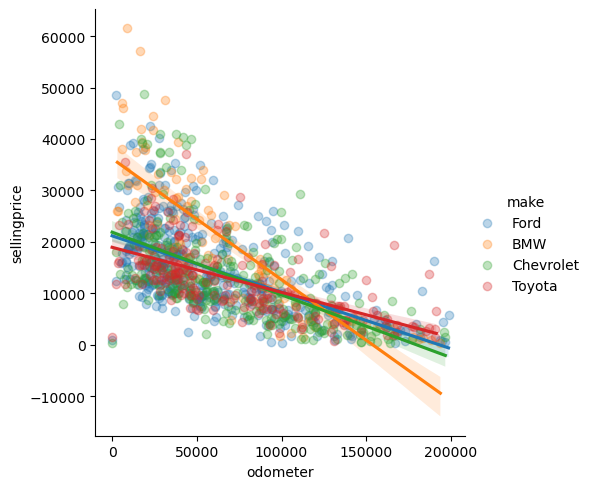

In [21]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

sns.lmplot(
    x = 'odometer', 
    y = 'sellingprice', 
    data = cars.query('make in @brand_list and sellingprice < 150000 and odometer < 200000').sample(1000), 
    hue = 'make',
    scatter_kws = ({'alpha': .3})
    
)

# Categorical Variable Relationships

* Bining the `condition` variable into increments of .5. For example, the first bin will be '1-1.5', the second '1.5-2', and so on up until the maximum condition value of 5. Use pd.cut() to create the bins.

* Building a barplot of the average price by condition bin.

C:\Users\12896\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


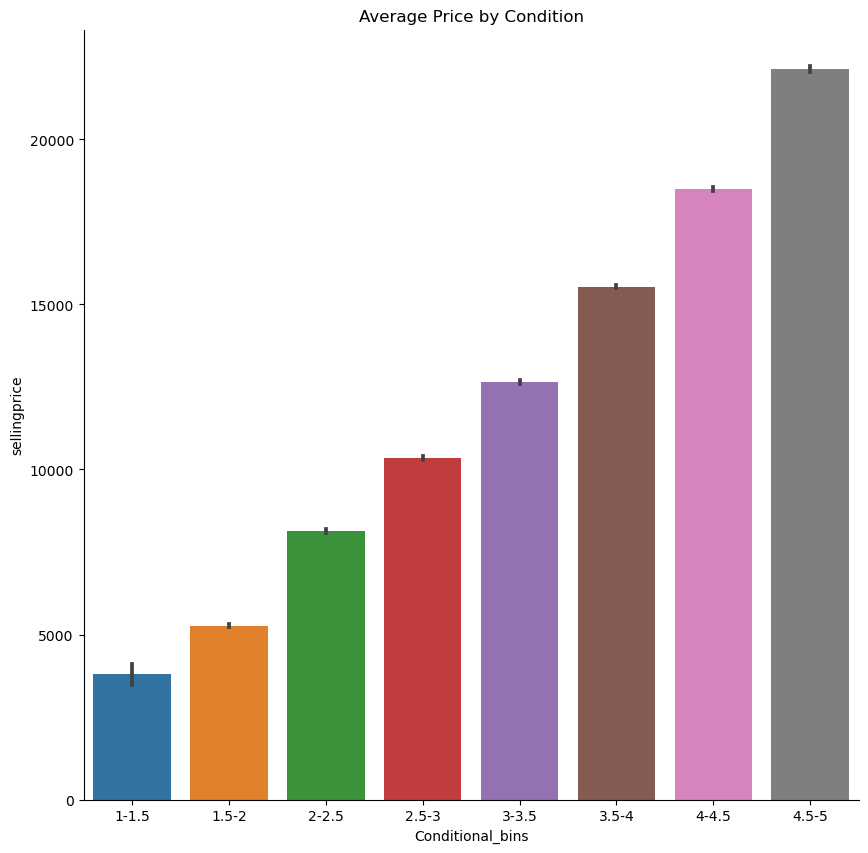

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]

cars["Conditional_bins"] = pd.cut(cars['condition'], bins=bins, labels = labels)

sns.barplot(
    x = 'Conditional_bins', 
    y = 'sellingprice', 
    data = cars
); 
ax.set_title('Average Price by Condition')
sns.despine(); 

# Price by make and condition

* Creating a pivot table with the top 10 most common car brands `make` column as rows, and condition bins as columns. The values in the table should be the average selling price for each make/condition combination. (Considered value_counts to get the top 10 most common brands).

* Building a heatmap from the data. (Which brands and quality levels have the highest selling prices? Does this match our expecations?)

In [25]:
top_10 = cars['make'].value_counts().iloc[:10].index
car_pivot = cars.loc[cars['make'].isin(top_10)].pivot_table(
    index = 'make', 
    columns = 'Conditional_bins', 
    values = {'sellingprice': 'mean'}
).droplevel(0, axis = 1)


In [27]:
car_pivot

Conditional_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556
Honda,5418.181818,5013.392857,7924.010577,9179.641598,11618.430007,13724.741442,16415.864917,19317.726330
Hyundai,3089.285714,5124.115218,7283.134792,8600.312323,10312.067568,11704.661821,13483.934264,16502.773497
Kia,4710.000000,4208.728571,6639.857005,8147.949483,10236.522039,11998.424662,13986.038947,16246.605411
Nissan,4592.682927,5509.596553,8431.096744,10016.940794,11893.454024,13056.597333,14654.276116,16105.622175


<Axes: title={'center': 'Avg. Selling Price by Make and Quality'}, xlabel='Conditional_bins', ylabel='make'>

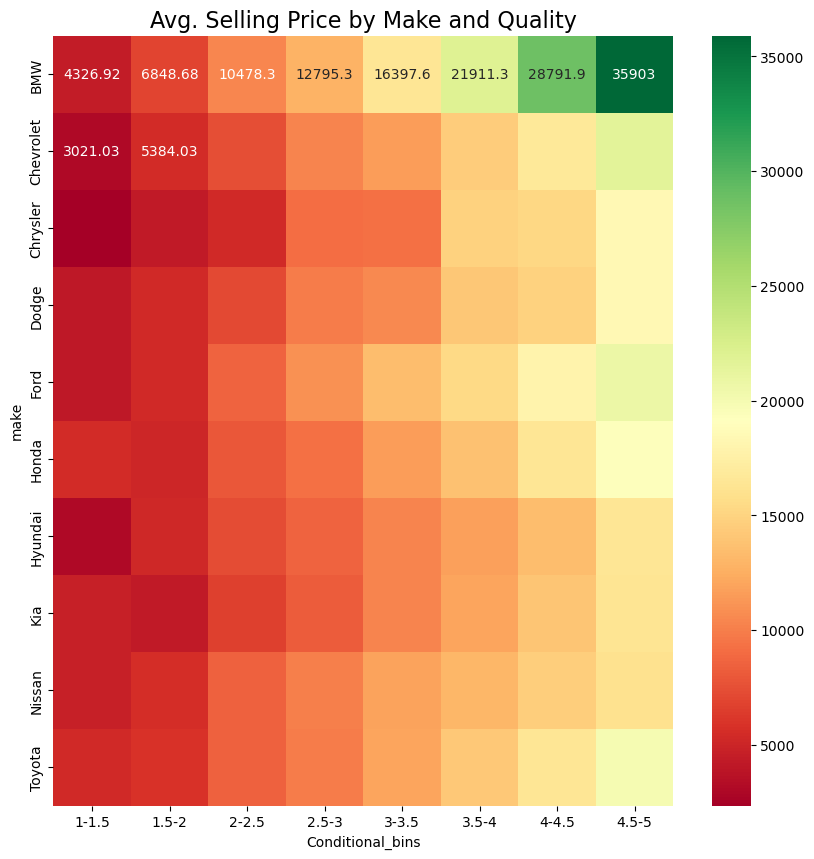

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.title('Avg. Selling Price by Make and Quality', fontsize = 16)

sns.heatmap(
    car_pivot, 
    annot = True, 
    cmap = 'RdYlGn', 
    fmt = 'g'
)

# Ford F-150 Deep Dive

Our client is mostly interested in purchasing work trucks - specifically the Ford F-150, the highest selling automobile for decades in the US. 

* Filtering data down to rows where `model` is "F-150".
* Building a histogram of sellingprice with 10 bins. 

In [31]:
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Conditional_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,2014-12-18 12:00:00,4.5-5
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,2014-12-18 12:00:00,4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,2014-12-18 12:00:00,3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,2014-12-17 12:15:00,3-3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,2014-12-18 12:00:00,4-4.5


C:\Users\12896\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sellingprice', ylabel='Count'>

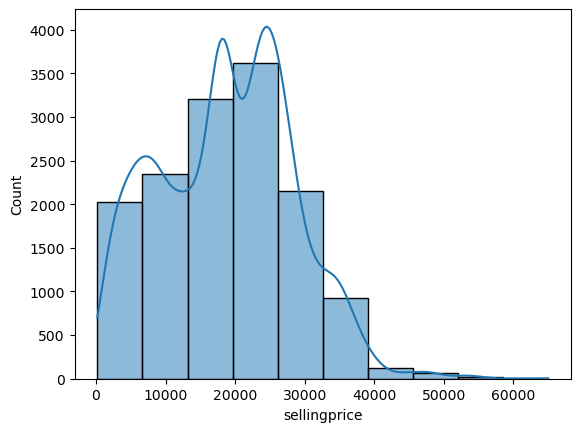

In [33]:
sns.histplot(
    x = 'sellingprice', 
    bins = 10, 
    data = f150s, 
    kde = True
)

* Building a barplot of `sellingprice` by `trim` for the F150s.

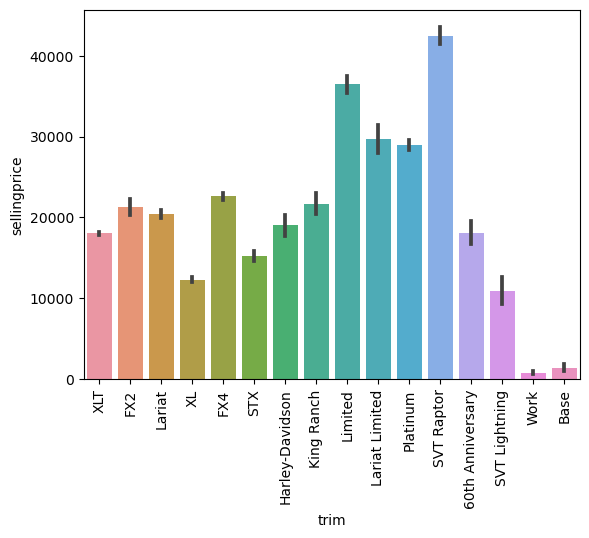

In [35]:
fig, ax = plt.subplots()

sns.barplot(
    x = 'trim', 
    y = 'sellingprice', 
    data = f150s
)

plt.xticks(rotation=90);

* Filtering the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"].

* Then, building a jointplot of `condition` (not binned) by `sellingprice`.

In [37]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

C:\Users\12896\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\12896\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


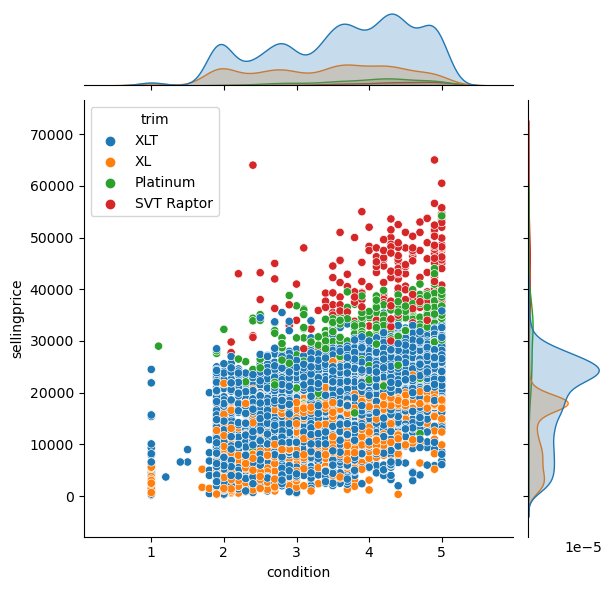

In [39]:
sns.jointplot(
    x = 'condition', 
    y = 'sellingprice', 
    kind = 'scatter', 
    data = f150s.query('trim in @trim_list'), 
    hue = 'trim'
);

### Are there any "Deals"?

Thanks to the charts above we're getting closer to honing in on the trucks to purchase.

* Column `diff_to_mmr` which is the difference between `sellingprice` and `mmr`.
* Building a barplot looking at mean `diff_to_mmr` by `color`.
* (Which color sells for more than the recommended price?)

In [41]:
f150s['diff_to_mmr'] = f150s['sellingprice']-f150s['mmr']

C:\Users\12896\AppData\Local\Temp\ipykernel_36824\809258302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f150s['diff_to_mmr'] = f150s['sellingprice']-f150s['mmr']


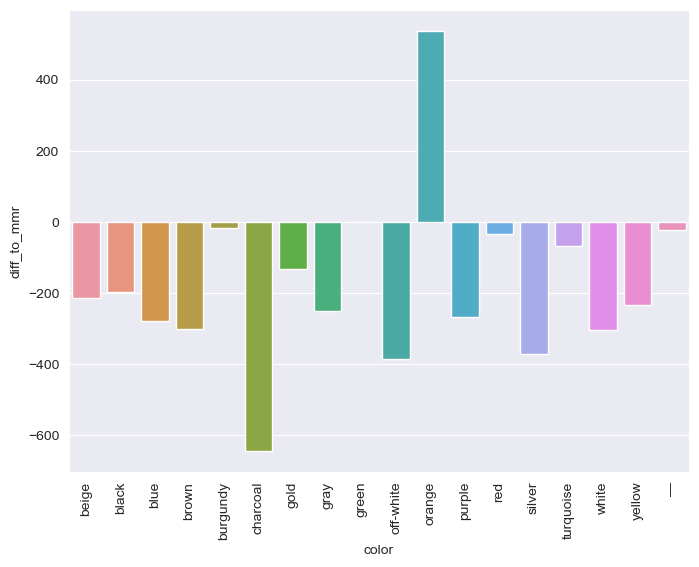

In [43]:
sns.set_style('darkgrid')

f150s_by_color = f150s.groupby('color', as_index = False).agg({'diff_to_mmr': 'mean'}) 

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    x = 'color', 
    y = 'diff_to_mmr', 
    data = f150s_by_color
)

plt.xticks(rotation = 90); 

# Op: More Negative: The more negative the bar goes, the further below the MMR price those cars are being sold. For instance, cars with the color charcoal have the largest negative difference, suggesting they are being sold for significantly less than the recommended MMR price.
# More Positive: The more positive the bar, the higher the cars with those colors are being sold above the recommended price. For example, cars with the color orange are being sold for a significant amount above the MMR price.

* Further filtering the data to the trims below. Excluding the color 'orange' and looking only at trucks from years between 2009 and 2014. 

In [45]:
f150_filtered = f150s.query("color != 'orange' and trim in @trim_list")

In [47]:
f150s_pivot_2 = f150_filtered.loc[f150_filtered['year'].between(2009, 2014)].pivot_table(
    index = 'trim', 
    columns = 'Conditional_bins', 
    values = {'sellingprice':'mean'}
).droplevel(0, axis=1)

<Axes: xlabel='Conditional_bins', ylabel='trim'>

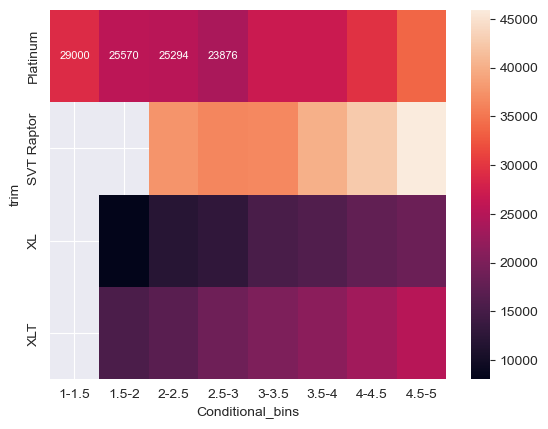

In [49]:
sns.heatmap(
    f150s_pivot_2, 
    annot=True, 
    fmt = '.0f', 
    annot_kws = {'size': 8}
)

### Best state to buy trucks in?

* Ok, we've decided on the XLT model; it has more features than XL but is still quite affordable. Also filtering out any trucks with a quality of less than 3.5. Our data frame should only have trucks with a quality of 3.5 or greater.
* Building a subplot with a bar chart of `state` by `diff_to_mmr` and `state` by `count` to find which states sell XLT models below mmr and have ample quantity.

In [51]:
XLT_models = f150_filtered.query("trim != 'XLT' and condition > 3.5").groupby('state', as_index=False ).agg(mean_diff = ("diff_to_mmr", 'mean'), auto_count = ('diff_to_mmr', 'count'))

<Axes: xlabel='state', ylabel='auto_count'>

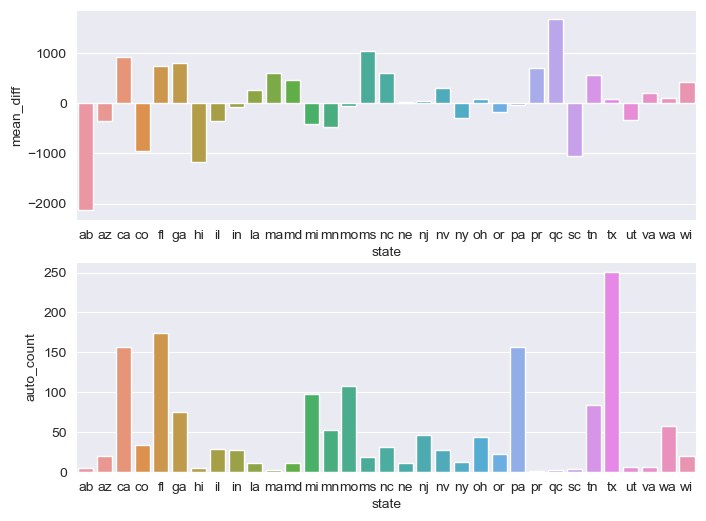

In [53]:
fig, ax = plt.subplots(2, figsize=(8, 6))

sns.barplot(
    x = 'state', 
    y = 'mean_diff', 
    data = XLT_models, 
    ax = ax[0]
)

sns.barplot(
    x = 'state', 
    y = 'auto_count', 
    data = XLT_models, 
    ax = ax[1]
)

* Ok, looks like Utah (our client has an office nearby) has a good amount of quantity and a low average price. Take a look at the average diff_to_mmr and count of cars by model year below.  

In [55]:
f150_filtered.query("trim == 'XLT' and state == 'ut' and color != 'orange'").groupby(['year']).agg(mean_diff = ('diff_to_mmr', 'mean'), count_cars = ('diff_to_mmr','count'), conditions = ('condition', lambda x: round(x.mean(), 1)))

,mean_diff,count_cars,conditions
year,,,
1999,1600.000000,1,2.5
2002,1050.000000,1,2.1
2003,-700.000000,1,2.1
2004,0.000000,1,1.9
2005,-1537.500000,2,2.3
2006,1950.000000,1,4.1
2007,-1850.000000,1,2.6
2008,-1225.000000,2,2.6
2009,-2316.666667,3,2.8
